In [1]:
from agents.DQN_Agent import DQN_Agent
from helpers.plot_util import *
from helpers.render_model import test_instances_of_env

In [2]:
agent= DQN_Agent(
                 env_name="CartPole-v1",
                 gamma=0.98,             ## 0.98 was good for Cartpole###############################
                 epsilon=1.0,
                 layer1_size=32, 
                 layer2_size=32,             
                 lr=0.001,               
                 mem_size=100000000,
                 batch_size=64,          #1024,    ########## with 1024 was good for Cartpole #######
                 epsilon_dec=0.0001,     #0.0003, ###### 0.0005 was OKAY not so good for Cartpole ###
                 epsilon_end=0.01,       #######_____________#####_____________________##############
                 reproduce_seed=None#42
                )

### Train DQN Agent

In [3]:
agent.train_multiple_episodes(num_episodes=50)      ## 500 was good

Eps: 2 ,  Eps steps: 26 ,Epsilon: 1.00, Ep_Reward : 26.00 , Average_Reward : 29.00/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
Eps: 50 ,  Eps steps: 23 ,Epsilon: 0.90, Ep_Reward : 23.00 , Average_Reward : 21.36Saving Model info.....

 CartPole-v1 Problem took 50 episodes


### Get recently trained model information

In [4]:
model,book_keeping=agent.get_trained_model_info()

### Learning Plots

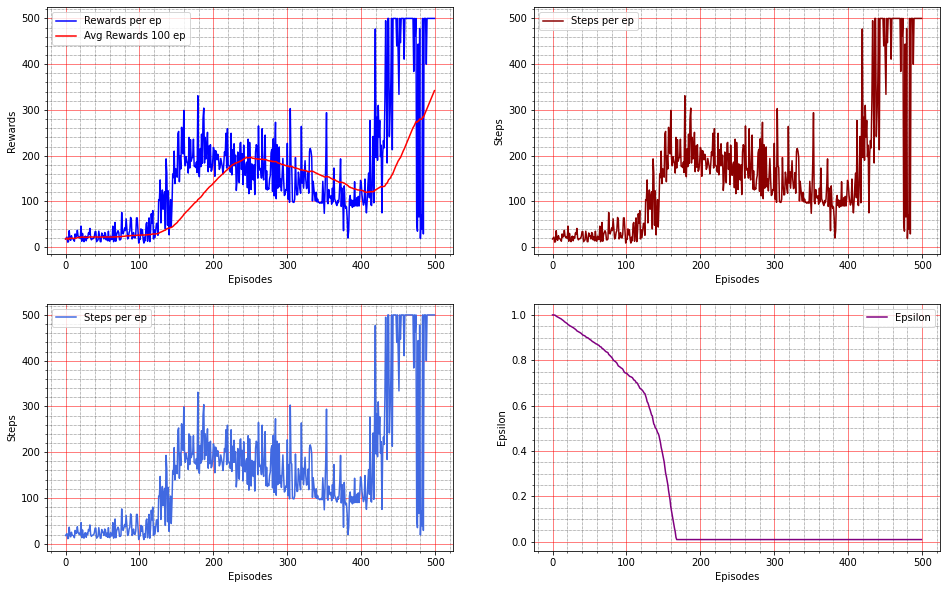

In [ ]:
learning_plot(book_keeping)

### Save the trained model manually

In [ ]:
agent.save_model()

### If you want to use a pretrained model use this cell

In [ ]:
model,book_keeping = agent.load_pre_trained_model_info(timestr="20211108-082804")
learning_plot(book_keeping)

### Test Cases for the Cartpole-v1

In [5]:
test_cases_data , image_paths  = test_instances_of_env(
                                        model=model,
                                        test_cases=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75],
                                        env_name=agent.env_name
                                       )

Tests # 42 , Rewards 102.0 , Steps 102
Tests # 900 , Rewards 120.0 , Steps 120
Tests # 930 , Rewards 91.0 , Steps 91
Tests # 180 , Rewards 295.0 , Steps 295
Tests # 660 , Rewards 500.0 , Steps 500
Tests # 240 , Rewards 220.0 , Steps 220
Tests # 960 , Rewards 201.0 , Steps 201
Tests # 450 , Rewards 173.0 , Steps 173
Tests # 30 , Rewards 120.0 , Steps 120
Tests # 90 , Rewards 145.0 , Steps 145
Tests # 150 , Rewards 98.0 , Steps 98
Tests # 210 , Rewards 125.0 , Steps 125
Tests # 330 , Rewards 94.0 , Steps 94
Tests # 420 , Rewards 176.0 , Steps 176
Tests # 510 , Rewards 120.0 , Steps 120
Tests # 75 , Rewards 227.0 , Steps 227


### Plot Test cases data

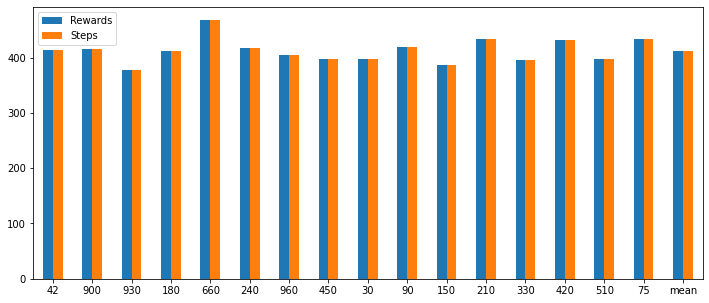

In [ ]:
plot_test_cases(test_cases_data)

### Render Test Case images for the LunarLander-v2

In [ ]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

x=len(test_cases_data)//4
y=len(test_cases_data)//4
grid = GridspecLayout(x, y)

for i in range(x):
    for j in range(y):
        img=open(image_paths[4*i+j],'rb').read()
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)

grid

TypeError: 'module' object is not callable

In [10]:
import IPython.display
second_img=image_paths[2]
print(second_img)
html_content = '<html><body><img src='+second_img+'/></body></html>'

IPython.display.HTML(data=html_content)
#IPython.display.IFrame(data=html_content, width=600, height=550)

./IMAGES/file_20211108-105127.gif


In [ ]:
from IPython.display import IFrame

# GIF link used as IFrame
iframe_url = 'xyz.html'

# resized output IFrame
IFrame(src=iframe_url, width=600, height=550)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbe52eb0-6905-4004-8022-6248894772ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>